In [108]:
import cifar10
import matplotlib.pyplot as plt

In [109]:
cifar10.data_path = "data/CIFAR-10/"

In [110]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [111]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [112]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [113]:
images_train.shape,cls_train.shape, labels_train.shape

((50000, 32, 32, 3), (50000,), (50000, 10))

In [114]:
images_test.shape,cls_test.shape, labels_test.shape

((10000, 32, 32, 3), (10000,), (10000, 10))

In [115]:
images_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [116]:
cls_train

array([6, 9, 9, ..., 9, 1, 1])

In [117]:
labels_train[0,:]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

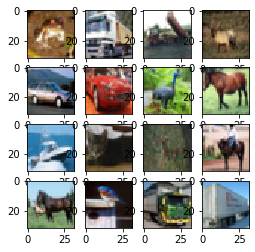

In [118]:
fig=plt.figure(figsize=(4,4))
for i in range(16):
    ax=fig.add_subplot(4,4,i+1)
    ax.imshow(images_train[i],cmap=plt.cm.bone)
plt.show()

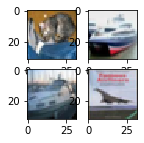

In [121]:
fig=plt.figure(figsize=(2,2))
for i in range(4):
    ax=fig.add_subplot(2,2,i+1)
    ax.imshow(images_test[i],cmap=plt.cm.bone)
plt.show()

In [66]:
from sklearn.decomposition import PCA

In [74]:
pca=PCA()
pca.fit(labels_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [75]:
pca.components_.shape

(10, 10)

In [76]:
k=0
total=sum(pca.explained_variance_)
currentSum=0
while currentSum/total<0.99:
    currentSum+=pca.explained_variance_[k]
    k=k+1
k

9

In [81]:
pca=PCA(n_components=k,whiten=True)
transformed_data=pca.fit_transform(labels_train)
transformed_data.shape

(50000, 9)

In [83]:
x_approx=pca.inverse_transform(transformed_data)
x_approx.shape

(50000, 10)

In [84]:
x_approx_images=x_approx.reshape((5000,10,10))

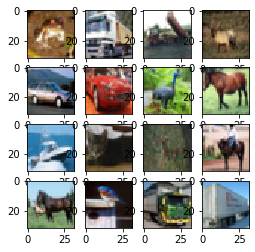

In [85]:
fig=plt.figure(figsize=(4,4))
for i in range(16):
    ax=fig.add_subplot(4,4,i+1)
    ax.imshow(images_train[i],cmap=plt.cm.bone)
plt.show()

In [93]:
x_train_pca=transformed_data
x_test_pca=pca.transform(labels_test)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble

In [98]:
rf=ensemble.RandomForestClassifier()

In [99]:
rf.fit(x_train_pca,cls_train)

C:\Users\Shreya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
y_pred=rf.predict(x_test_pca)

In [124]:
y_pred.shape

(10000,)

In [131]:
import numpy as np
np.savetxt('predictions.txt',y_pred,delimiter=',')